In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#https://archive.ics.uci.edu/ml/datasets/iris
dataset = pd.read_csv('data/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


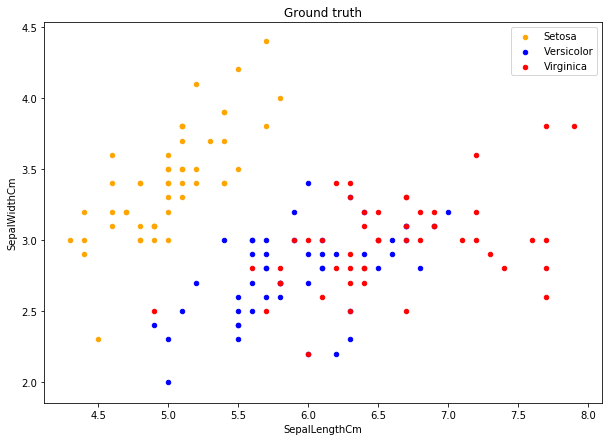

In [3]:

fig = dataset[dataset.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
dataset[dataset.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
dataset[dataset.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_title('Ground truth')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [4]:
x = dataset.iloc[:, [1,2,3,4]].values

In [5]:
kmeans = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10, random_state=0)

In [6]:
y_kmeans = kmeans.fit_predict(x)

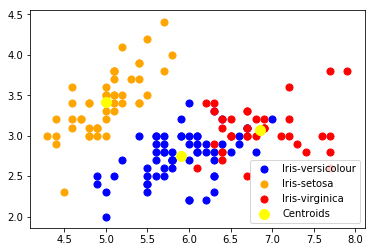

In [7]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'red', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_title('Built in sklearn spectral clustering', fontsize=18, fontweight='demi')
# plt.scatter(x[:, 0], x[:, 1], c=labelsS, s=100)


/home/harry/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


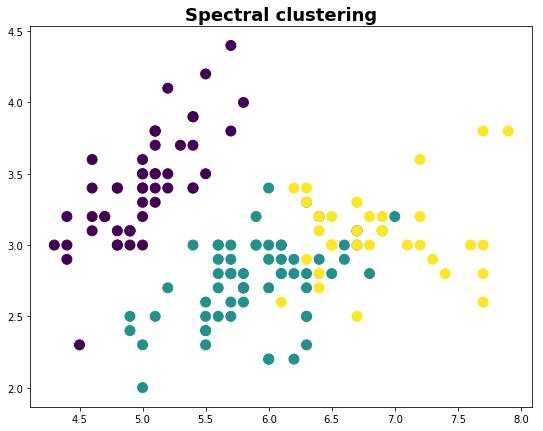

In [8]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')

labelsS = model.fit_predict(x)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(x[:, 0], x[:, 1], c=labelsS, s=100)

#Visualising the clusters
# plt.scatter(x[labelsS == 0, 0], x[labelsS == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
# plt.scatter(x[labelsS == 1, 0], x[labelsS == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
# plt.scatter(x[labelsS == 2, 0], x[labelsS == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# #Plotting the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# plt.legend()


In [9]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
labelsS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [11]:
#x = dataset.iloc[:,:-1].values
#y = dataset.iloc[:,-1].values

In [12]:
from sklearn.preprocessing import LabelEncoder

species_code = LabelEncoder()
dataset["species_code"] = species_code.fit_transform(dataset["Species"])
y = dataset["species_code"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((135, 4), (135,), (15, 4), (15,))

In [15]:
from sklearn import metrics

a = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10, random_state=0)
a.fit(X_train)
y_pred = a.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.2

In [16]:
y_pred, y_test

(array([0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0], dtype=int32), 114    2
 62     1
 33     0
 107    2
 7      0
 100    2
 40     0
 86     1
 76     1
 71     1
 134    2
 51     1
 73     1
 54     1
 63     1
 Name: species_code, dtype: int64)